In [173]:
# Import the modules
import numpy as np
import pandas as pd 
import plotly.express as px 
from pathlib import Path 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report 

In [174]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
new_data = pd.read_csv(Path("Resources/loan_data_2015.csv"))

# Review the DataFrame
new_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [175]:
#Change loan_status to binary values 
new_data['loan_status'] = new_data['loan_status'].map({'Issued': 0, 'Current': 1})

In [176]:
#Drop columns
new_data = new_data.drop(columns=['term','grade','sub_grade','emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'desc', 'purpose','title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint', 'issue_d', 'earliest_cr_line', 'next_pymnt_d', 'last_credit_pull_d', 'last_pymnt_d'], axis=1)

In [177]:
#Checking for missing values
new_data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          0
loan_status                     35081
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         203961
mths_since_last_record         346679
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        162
total_acc                           0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries  

In [178]:
#Dropping missing values
new_data = new_data.dropna(axis=0)

In [179]:
#Checking for missing values
new_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
annual_inc                     0
loan_status                    0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since

In [180]:
# Calculate descriptive statistics using describe function
new_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6.793610e+07,7.277509e+07,16061.538462,16061.538462,16061.538462,16.699231,443.245385,52690.793846,0.384615,33.681538,...,48132.230769,78.069231,1.461538,3.000000,4202.076923,70.869231,19661.538462,2.000000,0.692308,3.461538
std,4.351045e+05,4.440343e+05,8790.511074,8790.511074,8790.511074,4.905296,192.920319,26278.326586,0.506370,32.814344,...,40480.141115,19.052357,1.265924,2.415229,2779.287363,17.832292,9164.563861,1.870829,1.436698,3.204564
min,6.736802e+07,7.217979e+07,4800.000000,4800.000000,4800.000000,9.170000,154.350000,17000.000000,0.000000,10.840000,...,1518.000000,37.900000,0.000000,0.000000,112.000000,42.400000,2500.000000,0.000000,0.000000,0.000000
25%,6.752616e+07,7.237989e+07,8750.000000,8750.000000,8750.000000,13.440000,320.700000,37856.000000,0.000000,14.810000,...,20267.000000,70.400000,1.000000,1.000000,1957.000000,62.800000,14400.000000,1.000000,0.000000,1.000000
50%,6.787000e+07,7.272876e+07,14000.000000,14000.000000,14000.000000,17.570000,461.540000,51200.000000,0.000000,25.560000,...,40678.000000,83.700000,1.000000,3.000000,4173.000000,67.400000,18800.000000,1.000000,0.000000,2.000000
75%,6.837426e+07,7.326401e+07,24000.000000,24000.000000,24000.000000,18.990000,613.430000,67000.000000,1.000000,31.130000,...,92313.000000,88.900000,2.000000,3.000000,6210.000000,84.800000,23400.000000,2.000000,1.000000,5.000000
max,6.858621e+07,7.347601e+07,28000.000000,28000.000000,28000.000000,25.990000,714.070000,100000.000000,1.000000,136.970000,...,118025.000000,104.600000,4.000000,8.000000,9577.000000,101.400000,36400.000000,6.000000,5.000000,11.000000


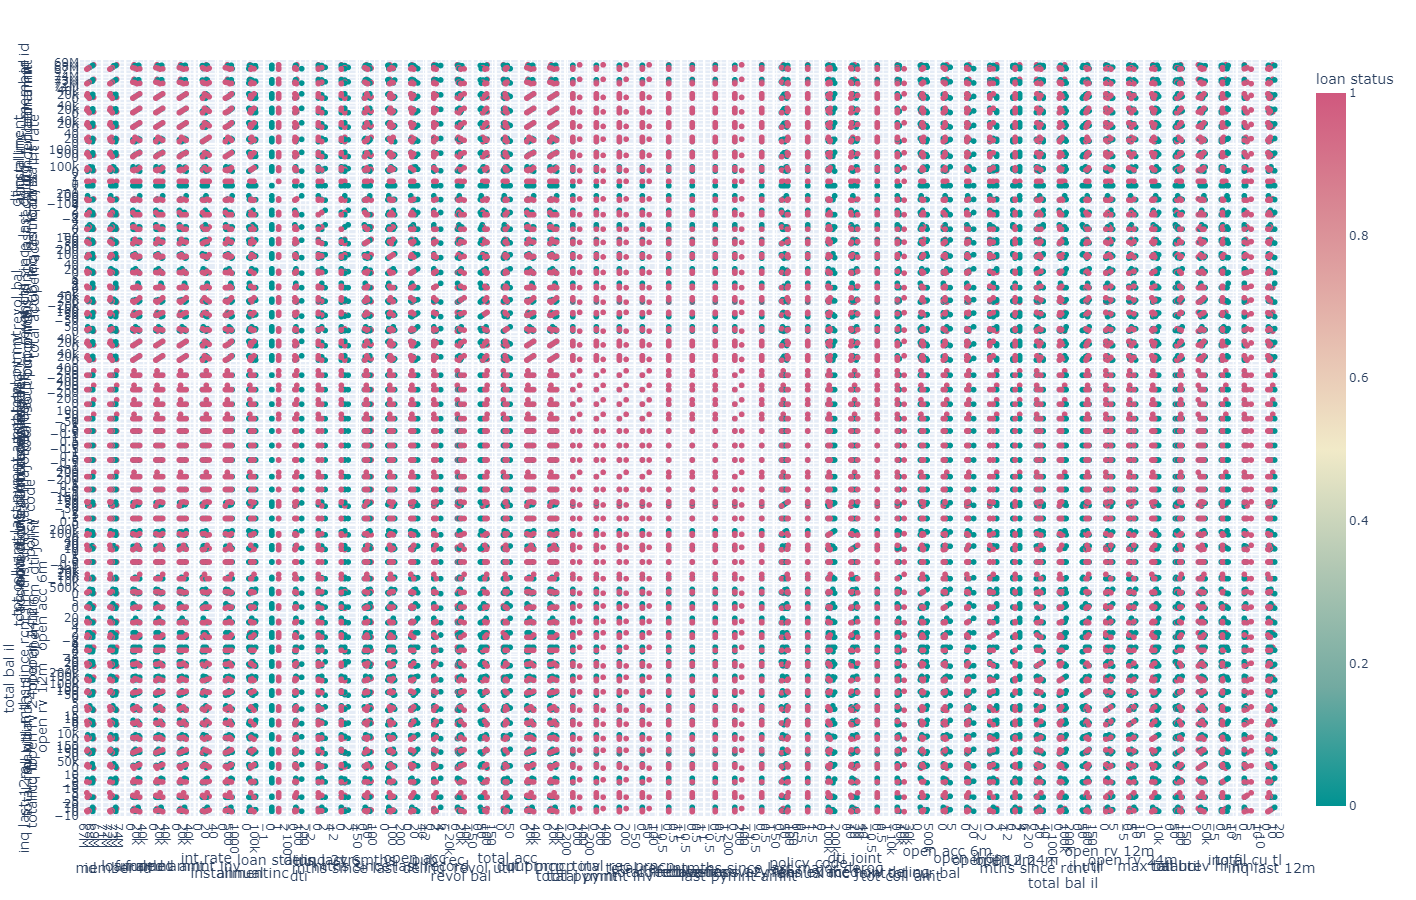

In [181]:
# Look for more outliers using scatterplot matrix
# Specify the column names for dimensions, color, and labels
dimensions = new_data.columns.tolist()
color = 'loan_status'
labels = {col: col.replace('_', ' ') for col in new_data.columns}

# Create the scatterplot matrix
fig = px.scatter_matrix(
    new_data,
    dimensions=dimensions,
    color=color,
    labels=labels,
    height=900,
    color_continuous_scale=px.colors.diverging.Tealrose
)

# Show the figure
fig.show(rot=90)

In [182]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = new_data['loan_status']

# Separate the X variable, the features
X = new_data.drop(columns=['loan_status'])

In [183]:
# Review the y variable Series
y.head()

565     0.0
629     1.0
2481    0.0
3260    0.0
3941    0.0
Name: loan_status, dtype: float64

In [184]:
# Review the X variable DataFrame
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
565,68340478,72927427,24000,24000,24000.0,13.44,551.50,96000.00,22.70,0.0,...,43145.0,70.4,1.0,3.0,6210.0,64.1,36400.0,2.0,0.0,5.0
629,68586213,73476013,8750,8750,8750.0,18.99,320.70,29524.32,46.71,0.0,...,92313.0,88.9,0.0,1.0,1458.0,89.3,2500.0,4.0,0.0,8.0
2481,68435132,73324912,25000,25000,25000.0,18.99,648.38,37856.00,23.17,0.0,...,20709.0,83.0,0.0,0.0,7631.0,84.8,10800.0,1.0,0.0,1.0
3260,67526157,72379890,14000,14000,14000.0,11.48,461.54,52000.00,31.13,1.0,...,118025.0,104.6,2.0,3.0,9577.0,101.4,20300.0,2.0,0.0,1.0
3941,68374257,73264007,12000,12000,12000.0,9.17,382.55,52000.00,30.96,0.0,...,20267.0,45.9,1.0,1.0,4961.0,47.5,18800.0,0.0,0.0,1.0


In [185]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [186]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', random_state=1, max_iter=251)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [187]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)

In [188]:
# Print the balanced_accuracy score of the model 
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, testing_predictions)}")

Balanced Accuracy Score: 0.25


In [189]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, testing_predictions)

array([[1, 3],
       [0, 0]], dtype=int64)

In [190]:
# Print the classification report for the model
print(f"                     Classifiction Report")
print(classification_report(y_test, testing_predictions))

                     Classifiction Report
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



In [191]:
#save this report
report = classification_report(y_test, testing_predictions, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df.to_csv('LogisticRegression_report.csv')